In [1]:
from pytrends.request import TrendReq
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#make a pytrends object to request Google Trends data
pytrends  = TrendReq(hl='en-US')

#extract data about weekly searches of certain keywords
kw_list = ["Python", "SQL", "javaScript", "R", "HTML"]
pytrends.build_payload(kw_list = ["Python","SQL","javaScript","R","HTML"], timeframe = 'today 5-y')

In [3]:
#store kewords data
Trends = pytrends.interest_over_time()
Trends = Trends.drop('isPartial', axis=1)
def reponse():
    if response.status_code == 429:
         time.sleep(int(response.headers["Retry-After"]))

Trends.head()

,Python,SQL,javaScript,R,HTML
date,,,,,
2017-10-08,21,19,13,63,16
2017-10-15,21,17,12,58,15
2017-10-22,21,18,13,63,16
2017-10-29,21,17,12,63,14
2017-11-05,21,19,12,67,16


In [4]:
Trends.tail()

,Python,SQL,javaScript,R,HTML
date,,,,,
2022-08-28,32,15,12,51,14
2022-09-04,33,15,11,51,14
2022-09-11,36,16,12,54,15
2022-09-18,40,17,13,51,16
2022-09-25,41,18,14,53,17


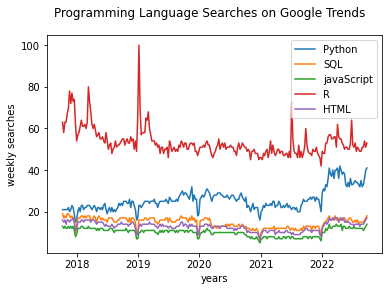

In [5]:
#plot Trends
plt.plot(Trends)

#add titles
plt.suptitle('Programming Language Searches on Google Trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(kw_list, loc='upper right')

plt.savefig('pk.png', format='png', dpi=300)

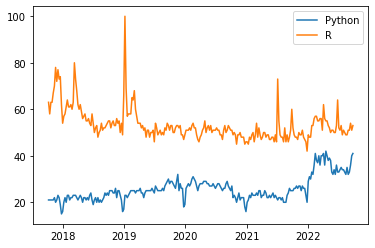

In [6]:
#compain language popularity
focus = ['Python', 'R'] 

plt.plot(Trends[focus])
plt.legend(focus)
plt.savefig('pl.png', format='png', dpi=300)

# `WHAT ARE THE TOP COUNTRIES SEARCHING FOR PYTHON?`

In [7]:
import pandas as pd

#extract country-level kewords search data
country_Trends = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Python"
data2 = country_Trends['Python'].nlargest(10)

#convert to dataframe
data2 = data2.to_frame()

data2

ConnectTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /trends/api/widgetdata/comparedgeo?req=%7B%22geo%22%3A+%7B%7D%2C+%22comparisonItem%22%3A+%5B%7B%22time%22%3A+%222017-10-03+2022-10-03%22%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22Python%22%7D%5D%7D%7D%2C+%7B%22time%22%3A+%222017-10-03+2022-10-03%22%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22SQL%22%7D%5D%7D%7D%2C+%7B%22time%22%3A+%222017-10-03+2022-10-03%22%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22javaScript%22%7D%5D%7D%7D%2C+%7B%22time%22%3A+%222017-10-03+2022-10-03%22%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22R%22%7D%5D%7D%7D%2C+%7B%22time%22%3A+%222017-10-03+2022-10-03%22%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22HTML%22%7D%5D%7D%7D%5D%2C+%22resolution%22%3A+%22COUNTRY%22%2C+%22locale%22%3A+%22en-US%22%2C+%22requestOptions%22%3A+%7B%22property%22%3A+%22%22%2C+%22backend%22%3A+%22IZG%22%2C+%22category%22%3A+0%7D%2C+%22dataMode%22%3A+%22PERCENTAGES%22%2C+%22userConfig%22%3A+%7B%22userType%22%3A+%22USER_TYPE_SCRAPER%22%7D%2C+%22includeLowSearchVolumeGeos%22%3A+true%7D&token=APP6_UEAAAAAYzyb-chv1IlKxYG8M88Yoo_Wr4TfVrPc&tz=360 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001C207365AF0>, 'Connection to trends.google.com timed out. (connect timeout=2)'))

In [ ]:
#plot a bar chart
data2.plot(kind='bar', legend=None)

#titles
plt.suptitle('Countries with the highest number of Python searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')
plt.savefig('cl.png', format='png', dpi=300)

# `PLOTTING RESULTS FOR MULTIPLE COUNTRIES`

In [ ]:
data3 = country_Trends[55:60]
data3

In [ ]:
#plot bar chart
data3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')
plt.savefig('bl.png', format='png', dpi=300)